<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [81]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
#Import the data

df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
#EDA

df.head()

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalin

In [84]:
df.shape

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28332, 24)

In [85]:
#Number of categories listed in the df
#About 10 different categories

df['primaryCategories'].value_counts()

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [86]:
df['reviews.text'][10000]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'This is not 39in long'

In [87]:
#GridSearch on just the Classifier

vect1 = TfidfVectorizer()
X_train = vect1.fit_transform(df['reviews.text'])
print(X_train.shape)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28332, 10361)


In [88]:
y = df['primaryCategories']
y.shape

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28332,)

In [89]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.7min finished
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_search.py:818: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [90]:
gs1.best_params_

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'max_depth': 10, 'n_estimators': 50}

In [91]:
gs1.best_score_

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.874205740643607

In [92]:
#Create and transform a sample text
sample_vec = vect1.transform(['I never used cleansers before, but this serum is great. I like the smell, and my skin does look more hydrated!'])
print(sample_vec.shape)

#Use the model to classify the sample text
gs1.predict(sample_vec)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\ensemble\_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


(1, 10361)


array(['Electronics'], dtype=object)

## GridSearch with BOTH Vectorizer and Classifier

In [93]:
pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(df['reviews.text'], df['primaryCategories'])

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.7min finished
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\model_selection\_search.py:818: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\tree\_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [94]:
gs2.best_params_

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'clf__max_depth': 20, 'vect__min_df': 5, 'vect__stop_words': None}

In [95]:
gs2.best_score_

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8871241476981286

In [96]:
gs2.predict(['Beauty, lotion, skin, makeup'])

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\sklearn\ensemble\_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array(['Health & Beauty'], dtype=object)

## How and LDA Model works

In [97]:
#Download spacy model

import spacy.cli
spacy.cli.download("en_core_web_md")

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [98]:
import re
import numpy as np
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
df2 = pd.DataFrame({
    'content': df['reviews.text'],
    'target': df['primaryCategories']
})
print(df2.shape)
df2.head()

(28332, 2)


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target
0,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,Health & Beauty
1,Bulk is always the less expensive way to go for products like these,Health & Beauty
2,Well they are not Duracell but for the price i am happy.,Health & Beauty
3,Seem to work as well as name brand batteries at a much better price,Health & Beauty
4,These batteries are very long lasting the price is great.,Health & Beauty


In [100]:
df3 = pd.DataFrame({
    'content': df['reviews.text'],
    'target': df['name']
})
print(df3.shape)
df3.head()

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28332, 2)


,content,target
0,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
1,Bulk is always the less expensive way to go for products like these,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
2,Well they are not Duracell but for the price i am happy.,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
3,Seem to work as well as name brand batteries at a much better price,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
4,These batteries are very long lasting the price is great.,AmazonBasics AAA Performance Alkaline Batteries (36 Count)


In [101]:
pd.set_option('display.max_colwidth', 300)

df3.sample(5)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target
21691,My daughter loves it. She loves the books that she can read.,"Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers"
15608,"Basically, the tab's features are good. There are huge Amazon collections. Kids can be allowed to use it without parents monitoring as parents control feature is good. Several useful Amazon products are offered free of charge. I hope that It is worth for the money value.","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black"
713,The brush is still buzzing my brain when I use it. No way any of the other batteries will do this. Been there done that.,AmazonBasics AAA Performance Alkaline Batteries (36 Count)
20797,Better than the original tablet we lost. Was in stock & at a great price. Called & could pick up in a few hours,"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers"
23727,This tablet is perfect for a young child. The case it comes with is wonderful and seems very protective.,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case"


In [102]:
from tqdm import tqdm
tqdm.pandas()

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
nlp = spacy.load("en_core_web_md", disable=['parser', 'tagger', 'ner'])

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
#Create tokens in the form of lemmas
df3['lemmas'] = df['reviews.text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True)])

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████| 28332/28332 [00:15<00:00, 1795.86it/s]


In [105]:
df3.head()

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,lemmas
0,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"[order, 3, item, bad, quality, miss, backup, spring, pcs, aluminum, battery, work]"
1,Bulk is always the less expensive way to go for products like these,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"[Bulk, expensive, way, product, like]"
2,Well they are not Duracell but for the price i am happy.,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"[Duracell, price, happy]"
3,Seem to work as well as name brand batteries at a much better price,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"[work, brand, battery, well, price]"
4,These batteries are very long lasting the price is great.,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"[battery, long, last, price, great]"


In [106]:
#Create a dictionary and dtm

id2word = corpora.Dictionary(df3['lemmas'])
corpus = [id2word.doc2bow(text) for text in df3['lemmas']]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
#How many words in the vocab?

len(id2word.keys())

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10716

In [108]:
#Remove extreme values

id2word.filter_extremes(no_below=3, no_above=0.2)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
#Re-check how many words are in vocab

len(id2word.keys())

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5039

In [110]:
#Re-create DTM with new dictionary of vocab

corpus = [id2word.doc2bow(text) for text in df3['lemmas']]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
df3.lemmas.iloc[1]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Bulk', 'expensive', 'way', 'product', 'like']

In [112]:
corpus[1]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]

In [113]:
[(id2word[word_id], word_count) for word_id, word_count in corpus[1]]

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('Bulk', 1), ('expensive', 1), ('like', 1), ('product', 1), ('way', 1)]

### Estimate a LDA Model with Gensim

In [115]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                       id2word=id2word,
                                                       num_topics=20,
                                                       chunksize=100,
                                                       passes=10,
                                                       per_word_topics=True,
                                                       workers=12)

lda_multicore.save('lda_multicore.model')

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 1min 10s


In [116]:
from gensim import models
lda_multicore = models.LdaModel.load('lda_multicore.model')

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
pprint(lda_multicore.print_topics())

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.102*"long" + 0.081*"brand" + 0.044*"price" + 0.036*"buy" + 0.027*"work" + '
  '0.025*"cheap" + 0.022*"last" + 0.019*"Duracell" + 0.018*"well" + '
  '0.016*"AA"'),
 (1,
  '0.198*"book" + 0.129*"read" + 0.053*"able" + 0.049*"access" + 0.037*"Got" + '
  '0.032*"use" + 0.024*"please" + 0.021*"Kids" + 0.021*"easy" + '
  '0.018*"choice"'),
 (2,
  '0.237*"great" + 0.198*"work" + 0.041*"product" + 0.039*"price" + '
  '0.032*"buy" + 0.030*"Buy" + 0.027*"fine" + 0.027*"recommend" + '
  '0.023*"young" + 0.016*"complaint"'),
 (3,
  '0.158*"old" + 0.138*"year" + 0.114*"love" + 0.062*"daughter" + 0.046*"buy" '
  '+ 0.042*"son" + 0.029*"child" + 0.027*"3" + 0.027*"purchase" + '
  '0.023*"game"'),
 (4,
  '0.148*"kid" + 0.141*"app" + 0.038*"game" + 0.037*"video" + 0.031*"great" + '
  '0.029*"play" + 0.026*"use" + 0.022*"phone" + 0.022*"lot" + 0.021*"age"'),
 (5,
  '0.157*"charge" + 0.079*"problem" + 0.046*"hold" + 0.039*"quickly" + '
  '0.038*"time" + 0.033*"different" + 0.024*"advertise" + 0

In [118]:
#Interpret LDA results, select appropriate number of topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.144871  0.095231       1        1  8.783111
18     0.097208 -0.232119       2        1  7.425424
4      0.083579 -0.188664       3        1  6.680436
3      0.089216 -0.203451       4        1  6.358549
8      0.125077  0.071940       5        1  6.231385
9      0.044628  0.090219       6        1  6.053061
6      0.119127 -0.047587       7        1  6.048578
7     -0.094932  0.118759       8        1  5.155441
13     0.145236 -0.038787       9        1  5.118730
2     -0.240292 -0.106198      10        1  4.791713
16     0.084451  0.121624      11        1  4.440227
17    -0.331123 -0.100299      12        1  4.403778
1      0.110952 -0.020423      13        1  4.040145
12     0.105196 -0.037571      14        1  3.970661
14    -0.280194 -0.057028      15        1  3.901421
10     0.055272 -0.016523      16        1  3.506681
19     0.025546  0.068584      17        1  3.464850
11     0.034305  0.158683      18        1  3.402376
15     0.032253  0.155126      19        1  3.346028
5     -0.060633  0.168484      20        1  2.877404, topic_info=        Term         Freq        Total Category  logprob  loglift
33      good  4984.000000  4984.000000  Default  30.0000  30.0000
101    Great  3615.000000  3615.000000  Default  29.0000  29.0000
20     great  6930.000000  6930.000000  Default  28.0000  28.0000
84      love  6256.000000  6256.000000  Default  27.0000  27.0000
17     price  5774.000000  5774.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
22      long   180.282307  3160.113064  Topic20  -3.9089   0.6844
383     take   108.100304   673.485650  Topic20  -4.4204   1.7189
177      far   128.908390  1399.407809  Topic20  -4.2443   1.1636
604     tell    82.287267   375.659897  Topic20  -4.6932   2.0298
13   product   102.857350  2704.012325  Topic20  -4.4701   0.2791

[1147 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1354     11  0.981843      +
400       1  0.003404      1
400       3  0.214443      1
400       5  0.142962      1
400       7  0.003404      1
...     ...       ...    ...
96       18  0.002543   year
813       5  0.986895    yes
983      10  0.996128  young
1285      2  0.995208     yr
1681      6  0.963749   zero

[2623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 19, 5, 4, 9, 10, 7, 8, 14, 3, 17, 18, 2, 13, 15, 11, 20, 12, 16, 6])

In [120]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                       id2word=id2word,
                                                       num_topics=num_topics,
                                                       chunksize=100,
                                                       passes=10,
                                                       per_word_topics=True,
                                                       workers=10)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df3['lemmas'], start=2, limit=22, step=4)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 7min 44s


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


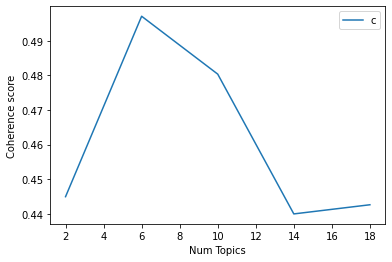

In [126]:
#Plot the coherence values
limit=22; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [123]:
coherence_values

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.4449306303296788,
 0.49706589069764157,
 0.4803415962321903,
 0.43995065260795513,
 0.44259604196935354]

In [127]:
#Print coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4449
Num Topics = 6  has Coherence Value of 0.4971
Num Topics = 10  has Coherence Value of 0.4803
Num Topics = 14  has Coherence Value of 0.44
Num Topics = 18  has Coherence Value of 0.4426


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
#Narrow the range of topics

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df3['lemmas'], start=5, limit=8, step=1)

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


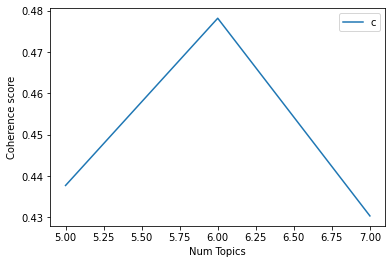

In [133]:
#Plot the coherence values
limit=8; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### 6 topics is the one with best coherence

In [134]:
#Second LDA model using with 6 topics

%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                       id2word=id2word,
                                                       num_topics=6,
                                                       chunksize=100,
                                                       passes=10,
                                                       per_word_topics=True,
                                                       workers=12)

lda_multicore.save('lda_multicore.model')

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 58.4 s


In [135]:
lda_multicore = models.LdaModel.load('lda_multicore.model')

pprint(lda_multicore.print_topics())

[(0,
  '0.067*"tablet" + 0.044*"love" + 0.029*"use" + 0.022*"old" + 0.021*"kid" + '
  '0.020*"great" + 0.017*"year" + 0.017*"easy" + 0.017*"game" + 0.015*"buy"'),
 (1,
  '0.081*"great" + 0.073*"app" + 0.064*"price" + 0.037*"work" + 0.032*"long" + '
  '0.029*"brand" + 0.024*"buy" + 0.019*"Amazon" + 0.017*"well" + '
  '0.015*"store"'),
 (2,
  '0.129*"Great" + 0.125*"good" + 0.088*"price" + 0.048*"Good" + '
  '0.045*"product" + 0.025*"work" + 0.022*"value" + 0.021*"quality" + '
  '0.019*"buy" + 0.017*"recommend"'),
 (3,
  '0.029*"purchase" + 0.022*"Amazon" + 0.016*"need" + 0.016*"friendly" + '
  '0.016*"well" + 0.013*"Got" + 0.013*"Purchased" + 0.011*"great" + '
  '0.010*"expect" + 0.010*"e"'),
 (4,
  '0.044*"read" + 0.043*"book" + 0.029*"Kindle" + 0.017*"light" + 0.013*"like" '
  '+ 0.012*"reader" + 0.011*"Fire" + 0.011*"size" + 0.011*"device" + '
  '0.010*"new"'),
 (5,
  '0.031*"screen" + 0.018*"work" + 0.018*"buy" + 0.016*"Amazon" + 0.015*"use" '
  '+ 0.015*"time" + 0.015*"long" + 0.01

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
#Interactive LDA model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.205011 -0.119757       1        1  33.458159
5      0.034559  0.137633       2        1  20.890271
4      0.213878 -0.095113       3        1  14.621569
1     -0.175775  0.092670       4        1  13.081086
3      0.032241  0.150938       5        1   9.840737
2     -0.309912 -0.166371       6        1   8.108179, topic_info=           Term         Freq        Total Category  logprob  loglift
101       Great  3281.000000  3281.000000  Default  30.0000  30.0000
2796     tablet  6991.000000  6991.000000  Default  29.0000  29.0000
33         good  4449.000000  4449.000000  Default  28.0000  28.0000
17        price  5028.000000  5028.000000  Default  27.0000  27.0000
20        great  5785.000000  5785.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4          item   136.045814   601.658438   Topic6  -5.2264   1.0256
626   excellent   114.241894   333.503629   Topic6  -5.4011   1.4410
161        nice   139.769456   895.668542   Topic6  -5.1994   0.6547
22         long   155.440188  2517.659132   Topic6  -5.0932  -0.2725
174         kid   132.005433  2555.633298   Topic6  -5.2566  -0.4509

[399 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
133       1  0.547569      2
133       2  0.415983      2
133       3  0.020375      2
133       4  0.007641      2
133       5  0.008489      2
...     ...       ...    ...
983       1  0.995014  young
983       6  0.004326  young
1285      3  0.334066     yr
1285      6  0.664722     yr
1681      6  0.983303   zero

[750 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 2, 4, 3])

### Try to narrow dictionary down further? Attempt LDA with 10 topics

In [142]:
#Second LDA model using with 10 topics

lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                       id2word=id2word,
                                                       num_topics=12,
                                                       chunksize=100,
                                                       passes=10,
                                                       per_word_topics=True,
                                                       workers=12)

lda_multicore.save('lda_multicore.model')

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
#Interactive LDA model

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

C:\Users\temsy\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.228763 -0.252836       1        1  17.550405
7      0.189496 -0.132330       2        1  13.346354
6      0.049885  0.055428       3        1  11.324030
5      0.086368  0.157416       4        1   9.608034
2      0.162836 -0.037679       5        1   8.692209
11    -0.052069  0.190425       6        1   6.736375
1     -0.268454 -0.106859       7        1   6.399002
8      0.089608  0.163572       8        1   5.993461
0     -0.015415  0.146658       9        1   5.342648
4     -0.223419 -0.048420      10        1   5.164050
9     -0.204616 -0.153962      11        1   5.023959
3     -0.042985  0.018587      12        1   4.819474, topic_info=        Term         Freq        Total Category  logprob  loglift
2796  tablet  7312.000000  7312.000000  Default  30.0000  30.0000
33      good  4468.000000  4468.000000  Default  29.0000  29.0000
20     great  6096.000000  6096.000000  Default  28.0000  28.0000
101    Great  2961.000000  2961.000000  Default  27.0000  27.0000
9       work  3687.000000  3687.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
147   pretty   113.118784   501.615354  Topic12  -4.8908   1.5431
17     price   185.212645  5033.052760  Topic12  -4.3977  -0.2698
905     free   115.290325   638.713080  Topic12  -4.8718   1.3205
84      love   125.434941  5178.322801  Topic12  -4.7874  -0.6879
12      like   110.792406  2841.162685  Topic12  -4.9115  -0.2118

[758 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3384      1  0.058294      $
3384      3  0.940744      $
1354      3  0.988746      +
400       2  0.269655      1
400       3  0.099735      1
...     ...       ...    ...
96       12  0.001304   year
813      12  0.984724    yes
983       1  0.976961  young
983       8  0.016351  young
1285      2  0.997854     yr

[1663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 7, 6, 3, 12, 2, 9, 1, 5, 10, 4])

### Results

After creating LDA visualizations for topics ranging from 6, 10, 12, I found it hard to discern what the topics were about. Even though the coherence value test suggested 6 was the best number of topics, the distributions changed so much between 6, 10, and 12, that none of them seemed superior to the others. The text could use cleaning to improve this. Otherwise, I wonder if the topics were organizing differently than what I was expecting, like category, or product. Perhaps the organization was on something else, like positivity, or whether family was mentioned versus purely on a product.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling